In [5]:
# data.columns
# 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
# 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

data = pd.read_csv('dataset/price_data_tr.csv')
# data

4.031835802973994


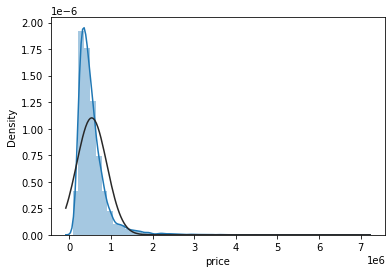

In [6]:
from scipy import stats
from scipy.stats import norm

sns.distplot(data['price'],fit = norm)
print(data['price'].skew())

0.43068823662512395


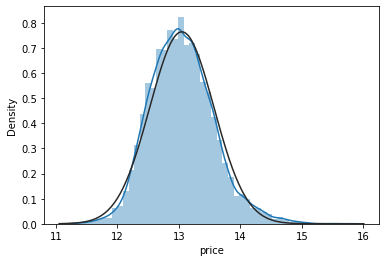

In [7]:
sns.distplot(np.log(data['price']), fit = norm)
print(np.log(data['price']).skew())

In [550]:
# data['date'] = pd.to_datetime(data['date']) # str에서 datetime으로 타입 변경
# data

In [8]:
corr = data.corr(method='pearson')
corr.iloc[:, 1]
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1310440590,20150413T000000,440000.0,3,2.50,2290,6302,2.0,0,0,...,9,2290,0,1997,0,98058,47.4350,-122.107,2700,7500
1,1437580480,20140918T000000,994000.0,5,3.25,4260,7861,2.0,0,0,...,10,4260,0,2005,0,98074,47.6110,-121.992,4020,7528
2,7617500075,20140721T000000,427000.0,3,1.75,2000,7111,1.0,0,0,...,7,1360,640,1956,0,98177,47.7676,-122.373,1830,9000
3,8122100130,20140618T000000,415000.0,3,1.75,1270,4800,1.0,0,0,...,7,1270,0,1952,2014,98126,47.5362,-122.376,1220,4800
4,4476400275,20150114T000000,335000.0,3,1.75,2100,8298,1.0,0,0,...,7,1230,870,1952,0,98166,47.4601,-122.360,1700,10830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12963,1773100604,20140721T000000,346000.0,3,3.25,1500,1442,2.0,0,0,...,8,1150,350,2007,0,98106,47.5592,-122.362,1500,1533
12964,6403510090,20141111T000000,437500.0,4,2.50,2680,7513,2.0,0,0,...,8,2680,0,1998,0,98059,47.4956,-122.161,2640,7243
12965,2124049160,20150416T000000,440000.0,6,3.00,2510,5310,1.0,0,0,...,7,1460,1050,1944,0,98108,47.5533,-122.304,1390,5407
12966,1310960190,20141021T000000,263000.0,3,1.75,1660,7210,1.0,0,0,...,7,1660,0,1977,0,98032,47.3609,-122.274,2150,7350


In [552]:
data['price'] = np.log(data['price'])
corr = data.corr(method='pearson')
corr.iloc[:, 1]

id               0.001369
price            1.000000
bedrooms         0.356079
bathrooms        0.547390
sqft_living      0.691444
sqft_lot         0.088257
floors           0.305246
waterfront       0.179603
view             0.346067
condition        0.038593
grade            0.705130
sqft_above       0.600118
sqft_basement    0.314914
yr_built         0.078156
yr_renovated     0.101258
zipcode         -0.031402
lat              0.447475
long             0.042046
sqft_living15    0.620374
sqft_lot15       0.083150
Name: price, dtype: float64

In [553]:
data['yr_max'] = np.maximum(np.array(data.yr_built), np.array(data.yr_renovated))
data = data.drop(['yr_built','yr_renovated'], axis=1)

data['zipcode'] = -data['zipcode']

corr = data.corr(method='pearson')
corr.iloc[1:, 1]

price            1.000000
bedrooms         0.356079
bathrooms        0.547390
sqft_living      0.691444
sqft_lot         0.088257
floors           0.305246
waterfront       0.179603
view             0.346067
condition        0.038593
grade            0.705130
sqft_above       0.600118
sqft_basement    0.314914
zipcode          0.031402
lat              0.447475
long             0.042046
sqft_living15    0.620374
sqft_lot15       0.083150
yr_max           0.122833
Name: price, dtype: float64

In [554]:
# nor_data = data.iloc[:, 2:].apply(lambda x: (x-x.mean()) / (x.std()))
# nor_data = data.iloc[:, 2:].apply(lambda x: (x-x.min()) / (x.max()-x.min()))
# nor_data = data.iloc[:, 2:].apply(lambda x: x ** 2)
# corr = nor_data.corr(method='pearson')
# corr.iloc[:, 0]

In [555]:
rp = 6 / math.pi ** 2
nor_data = data.iloc[:, 2:].apply(lambda x: x ** rp)
corr1 = nor_data.corr(method='pearson')
corr1.iloc[:, 0]

price            1.000000
bedrooms         0.353828
bathrooms        0.536756
sqft_living      0.689841
sqft_lot         0.122447
floors           0.311983
waterfront       0.176947
view             0.343937
condition        0.039796
grade            0.701354
sqft_above       0.597488
sqft_basement    0.285969
zipcode               NaN
lat              0.450234
long                  NaN
sqft_living15    0.617938
sqft_lot15       0.109456
yr_max           0.122674
Name: price, dtype: float64

In [556]:
corr.iloc[1:, 1] - corr1.iloc[:, 0]

price            0.000000
bedrooms         0.002251
bathrooms        0.010634
sqft_living      0.001603
sqft_lot        -0.034191
floors          -0.006737
waterfront       0.002657
view             0.002130
condition       -0.001202
grade            0.003775
sqft_above       0.002630
sqft_basement    0.028944
zipcode               NaN
lat             -0.002760
long                  NaN
sqft_living15    0.002436
sqft_lot15      -0.026305
yr_max           0.000159
Name: price, dtype: float64

In [560]:
# data['long'] 0.042046
# abs(da)
corr = data.corr(method='pearson')
corr.iloc[1:, 1]

price            1.000000
bedrooms         0.356079
bathrooms        0.547390
sqft_living      0.691444
sqft_lot         0.088257
floors           0.305246
waterfront       0.179603
view             0.346067
condition        0.038593
grade            0.705130
sqft_above       0.600118
sqft_basement    0.314914
zipcode          0.031402
lat              0.447475
long             0.042046
sqft_living15    0.620374
sqft_lot15       0.083150
yr_max           0.122833
Name: price, dtype: float64

In [563]:
nor_data = data.iloc[:, 2:].apply(lambda x: abs(x))
corr2 = nor_data.corr(method='pearson')
corr2.iloc[:, 0]

price            1.000000
bedrooms         0.356079
bathrooms        0.547390
sqft_living      0.691444
sqft_lot         0.088257
floors           0.305246
waterfront       0.179603
view             0.346067
condition        0.038593
grade            0.705130
sqft_above       0.600118
sqft_basement    0.314914
zipcode         -0.031402
lat              0.447475
long            -0.042046
sqft_living15    0.620374
sqft_lot15       0.083150
yr_max           0.122833
Name: price, dtype: float64